In [1]:
import numpy as np
import pandas as pd 
from scipy.optimize import least_squares
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df1 = pd.read_csv("Data/YC2003_2008.csv")
df2 = pd.read_csv("Data/YC2008_2013.csv")
df3 = pd.read_csv("Data/YC2013_2018.csv")
df4 = pd.read_csv("Data/YC2018_2023.csv")
df5 = pd.read_csv("Data/YC2023.csv")

In [66]:
df = pd.concat([df1[::-1], df2[::-1], df3[::-1], df4[::-1], df5[::-1]])

In [69]:
df = df.reset_index()

In [74]:
df = df.drop(["Unnamed: 0", "index"], axis=1)

In [76]:
df.to_csv("YCgen.csv")

### Реализация фита модели для одного набора переменных

In [81]:
def fun(x, time: np.array, profit: np.array):
            return x[0] + (x[1] + x[2]) * (x[3] / time) * (1 - np.exp(- time / x[3])) - x[2] * np.exp(- time / x[3]) - profit

Times = np.array([0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0,15.0,20.0,30.0])

Profits = np.array([12.74,13.1,13.5,13.9,15.14,15.51,15.13,14.31,13.15,11.83,11.04,10.23])

res_lsq = least_squares(fun, np.array([1., 1., 1., 1.]), args=(Times, 100* Profits))

### Формирование основного датасета

In [2]:
df = pd.read_csv("Data/YCgen.csv")

In [3]:
df = df.drop(["Unnamed: 0"], axis=1)

In [117]:
df.head()

,date,0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0,15.0,20.0,30.0
0,2003-01-04,11.68,12.31,12.76,13.08,13.63,13.72,13.63,13.53,13.45,13.38,13.35,13.32
1,2003-01-05,11.09,11.70,12.16,12.50,13.14,13.30,13.31,13.27,13.23,13.20,13.19,13.17
2,2003-01-08,10.84,11.61,12.15,12.53,13.18,13.30,13.29,13.24,13.19,13.15,13.13,13.11
3,2003-01-09,10.46,11.13,11.67,12.09,13.02,13.31,13.38,13.32,13.25,13.19,13.16,13.13
4,2003-01-10,10.10,11.08,11.79,12.28,13.14,13.31,13.27,13.19,13.11,13.04,13.00,12.97


In [123]:
beta0 = np.array([])
beta1 = np.array([])
beta2 = np.array([])
tau = np.array([])

WLbeta0 = np.array([])
WLbeta1 = np.array([])
WLbeta2 = np.array([])
WLtau = np.array([])

p3   = df["0.25"].astype(float)
p6   = df["0.5"].astype(float)
p9   = df["0.75"].astype(float)
p12  = df["1.0"].astype(float)
p24  = df["2.0"].astype(float)
p36  = df["3.0"].astype(float)
p60  = df["5.0"].astype(float)
p84  = df["7.0"].astype(float)
p120 = df["10.0"].astype(float)
p180 = df["15.0"].astype(float)
p240 = df["20.0"].astype(float)
p360 = df["30.0"].astype(float)

Times = np.array(np.array([0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0,15.0,20.0,30.0]))
WLTimes = np.array(np.array([0.25,0.5,0.75,1.0,2.0,3.0,5.0,7.0,10.0]))

i = 0

WLProfits = np.array([p3[i], p6[i], p9[i], p12[i], p24[i], p36[i], p60[i], p84[i], p120[i]])
Profits = np.array([p3[i], p6[i], p9[i], p12[i], p24[i], p36[i], p60[i], p84[i], p120[i], p180[i], p240[i], p360[i]])

res_lsq = least_squares(fun, np.array([850., -300., 100., 1.5]), args=(WLTimes, 100 * WLProfits))
# WLb0, WLb1, WLb2, tau = res_lsq.x
WLbeta0 = np.append(WLbeta0, res_lsq.x[0])
WLbeta1 = np.append(WLbeta1, res_lsq.x[1])
WLbeta2 = np.append(WLbeta2, res_lsq.x[2])
WLtau = np.append(WLtau, res_lsq.x[3])
res_lsq2 = least_squares(fun, np.array([850., -300., 100., 1.5]), args=(Times, 100 * Profits))
# b0, b1, b2, tau = res_lsq2.x
beta0 = np.append(beta0, res_lsq2.x[0])
beta1 = np.append(beta1, res_lsq2.x[1])
beta2 = np.append(beta2, res_lsq2.x[2])
tau = np.append(tau, res_lsq2.x[3])


for i in range(1, len(p3)):
    WLProfits = np.array([p3[i], p6[i], p9[i], p12[i], p24[i], p36[i], p60[i], p84[i], p120[i]])
    Profits = np.array([p3[i], p6[i], p9[i], p12[i], p24[i], p36[i], p60[i], p84[i], p120[i], p180[i], p240[i], p360[i]])
    
    if(res_lsq.x[0] > 1000 or res_lsq.x[0] < -1000):
        
    res_lsq = least_squares(fun, res_lsq.x, args=(WLTimes, 100 * WLProfits))

    # WLb0, WLb1, WLb2, tau = res_lsq.x

    WLbeta0 = np.append(WLbeta0, res_lsq.x[0])
    WLbeta1 = np.append(WLbeta1, res_lsq.x[1])
    WLbeta2 = np.append(WLbeta2, res_lsq.x[2])
    WLtau = np.append(WLtau, res_lsq.x[3])

    res_lsq2 = least_squares(fun, res_lsq.x, args=(Times, 100 * Profits))

    # b0, b1, b2, tau = res_lsq2.x

    beta0 = np.append(beta0, res_lsq2.x[0])
    beta1 = np.append(beta1, res_lsq2.x[1])
    beta2 = np.append(beta2, res_lsq2.x[2])
    tau = np.append(tau, res_lsq2.x[3])

/tmp/ipykernel_14349/2036753993.py:2: RuntimeWarning: overflow encountered in exp
  return x[0] + (x[1] + x[2]) * (x[3] / time) * (1 - np.exp(- time / x[3])) - x[2] * np.exp(- time / x[3]) - profit
/tmp/ipykernel_14349/2036753993.py:2: RuntimeWarning: invalid value encountered in subtract
  return x[0] + (x[1] + x[2]) * (x[3] / time) * (1 - np.exp(- time / x[3])) - x[2] * np.exp(- time / x[3]) - profit


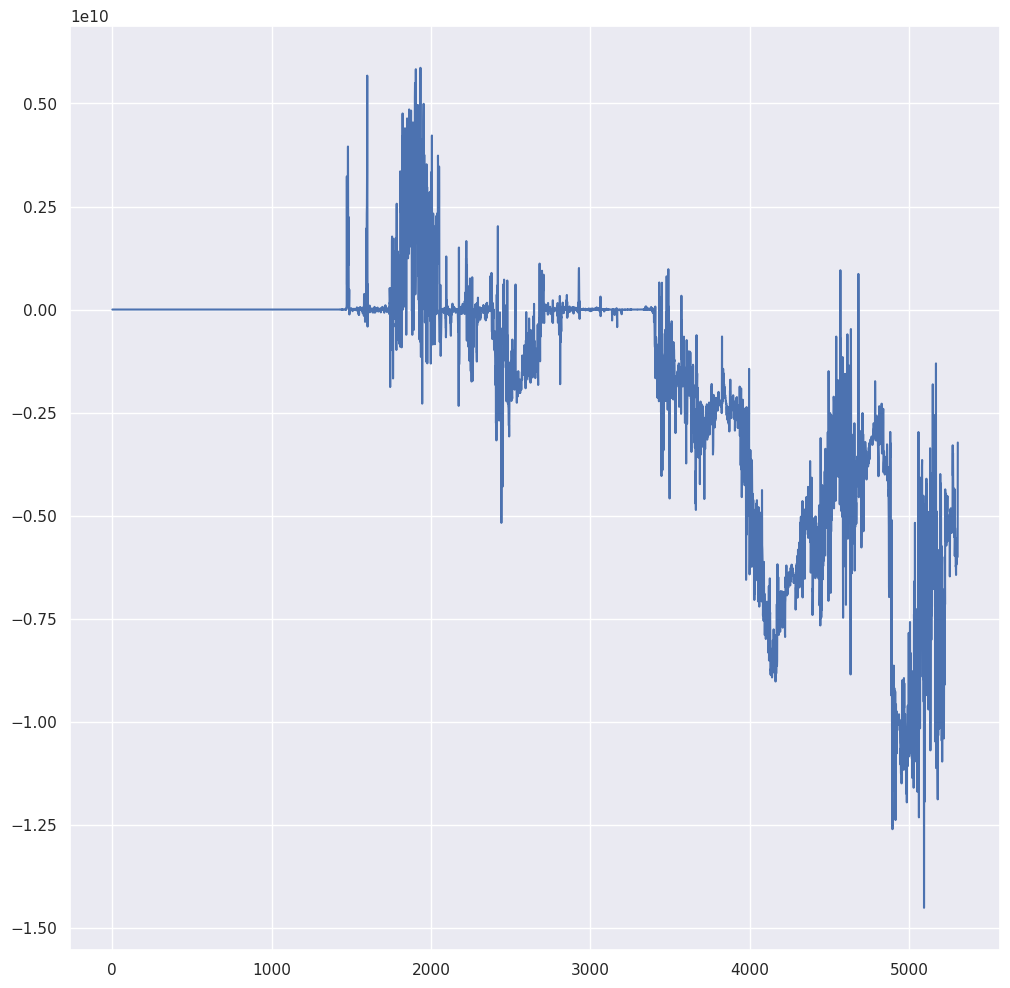

In [128]:
plt.plot(beta0)

In [88]:
df["beta0"] = beta0
df["beta1"] = beta1
df["beta2"] = beta2
df["tau"] = tau

In [89]:
df2["WLbeta0"] = WLbeta0
df2["WLbeta1"] = WLbeta1
df2["WLbeta2"] = WLbeta2
df2["WLtau"] = WLtau

In [91]:
df.to_csv("General_ds.csv")